In [2]:
pip install yfinance

     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     -------------------- ----------------- 524.3/949.2 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.6 MB 2.1 MB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.6 MB 1.8 MB/s eta 0:0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


# Question 1: Extracting Tesla Stock Data Using yfinanceme

In [21]:
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Save to CSV file
tesla_data.to_csv('tesla_stock_data.csv', index=False)

# Display the first five rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# 2. Extracting Tesla Revenue Data Using Web Scraping

In [16]:
pip install  html5lib

Note: you may need to restart the kernel to use updated packages.


In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_tesla_revenue():
    url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
    
    try:
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('table', {'class': 'historical_data_table'})
        
        if not table:
            print("Could not find the revenue table.")
            return None
        
        revenue_data = []
        rows = table.find_all('tr')
        
        for row in rows[1:]:  # Skip header row
            cols = row.find_all('td')
            if len(cols) >= 2:
                period = cols[0].get_text(strip=True)
                revenue = cols[1].get_text(strip=True).replace('$', '').replace(',', '')
                try:
                    revenue = float(revenue)
                except ValueError:
                    revenue = None
                revenue_data.append({'Period': period, 'Revenue': revenue})
        
        df = pd.DataFrame(revenue_data)
        return df
    
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Execute and display results
tesla_revenue = scrape_tesla_revenue()

if tesla_revenue is not None:
    print("Last 5 Rows of Tesla Revenue Data:")
    print(tesla_revenue.tail())
else:
    print("Failed to retrieve data.")

Last 5 Rows of Tesla Revenue Data:
   Period  Revenue
11   2013   2013.0
12   2012    413.0
13   2011    204.0
14   2010    117.0
15   2009    112.0


 # 3. Extracting GameStop Stock Data Using yfinance 

In [25]:
import yfinance as yf

# Fetch data with 1-day interval
gme = yf.Ticker("GME")
gme_data = gme.history(period="5y", interval="1d")

# Reset index and display
gme_data.reset_index(inplace=True)
gme_data.head()



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-07-10 00:00:00-04:00,1.0500,1.0950,1.0450,1.0850,5643200,0.0,0.0
1,2020-07-13 00:00:00-04:00,1.0875,1.1375,1.0650,1.0650,16864800,0.0,0.0
2,2020-07-14 00:00:00-04:00,1.0550,1.0775,1.0175,1.0200,9046400,0.0,0.0
3,2020-07-15 00:00:00-04:00,1.0325,1.0725,1.0325,1.0475,5896400,0.0,0.0
4,2020-07-16 00:00:00-04:00,1.0475,1.0500,1.0225,1.0425,5320400,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_gme_revenue():
    url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
    
    try:
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find all tables - we'll look for the annual revenue table
        tables = soup.find_all('table')
        
        # The revenue table is typically the second table on the page
        if len(tables) < 2:
            print("Could not find revenue tables.")
            return None
            
        revenue_table = tables[1]  # Second table usually contains annual revenue
        
        # Extract data
        revenue_data = []
        rows = revenue_table.find_all('tr')
        
        for row in rows[1:]:  # Skip header row
            cols = row.find_all('td')
            if len(cols) >= 2:
                year = cols[0].get_text(strip=True)
                revenue = cols[1].get_text(strip=True).replace('$', '').replace(',', '')
                
                try:
                    revenue = float(revenue)
                except ValueError:
                    revenue = None
                
                revenue_data.append({'Year': year, 'Revenue': revenue})
        
        df = pd.DataFrame(revenue_data)
        return df
    
    except Exception as e:
        print(f"Error: {e}")
        return None

# Execute function
gme_revenue = scrape_gme_revenue()

if gme_revenue is not None:
    print("Last 5 rows of GME Revenue Data:")
    print(gme_revenue.tail())


Last 5 rows of GME Revenue Data:
          Year  Revenue
61  2010-01-31   3524.0
62  2009-10-31   1835.0
63  2009-07-31   1739.0
64  2009-04-30   1981.0
65  2009-01-31   3492.0


# Question 5 - Tesla Stock and Revenue Dashboard

$TSLA: possibly delisted; no price data found  (1d 1926-08-03 -> 2025-07-09)


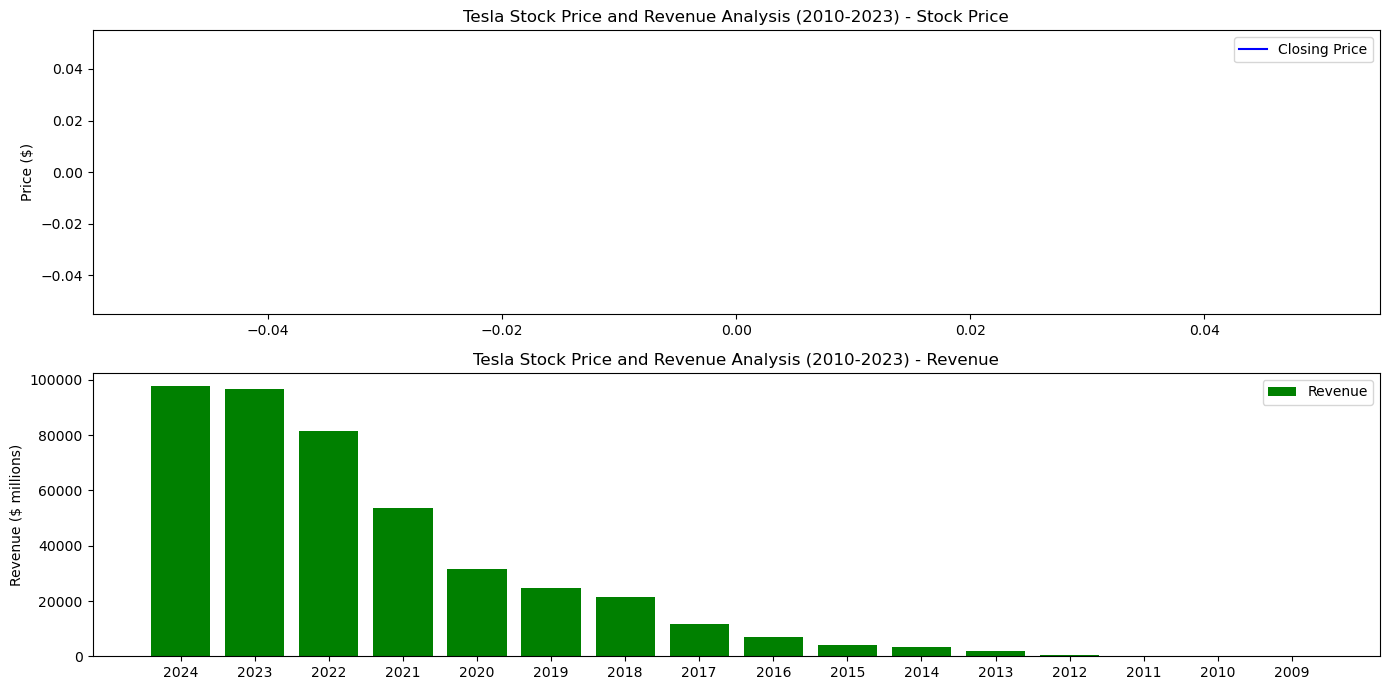

In [28]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 7))
    
    # Plot stock data
    plt.subplot(2, 1, 1)
    plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue')
    plt.title(title + ' - Stock Price')
    plt.ylabel('Price ($)')
    plt.legend()
    
    # Plot revenue data if available
    if revenue_data is not None:
        plt.subplot(2, 1, 2)
        plt.bar(revenue_data['Period'], revenue_data['Revenue'], label='Revenue', color='green')
        plt.title(title + ' - Revenue')
        plt.ylabel('Revenue ($ millions)')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Fetch Tesla stock data
tsla = yf.Ticker("TSLA")
tsla_data = tsla.history(period="max")
tsla_data.reset_index(inplace=True)

# Get Tesla revenue data (from previous scraping function)
# You can use the tesla_revenue DataFrame from Question 1 here
# If not available, use None for revenue_data

# Create the graph
make_graph(tsla_data, 
        tesla_revenue,  # Replace with your DataFrame or None
        "Tesla Stock Price and Revenue Analysis (2010-2023)")

# Question 6 - GameStop Stock and Revenue Dashboard-

c:\Users\HP\Documents\DS\sample_projects\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


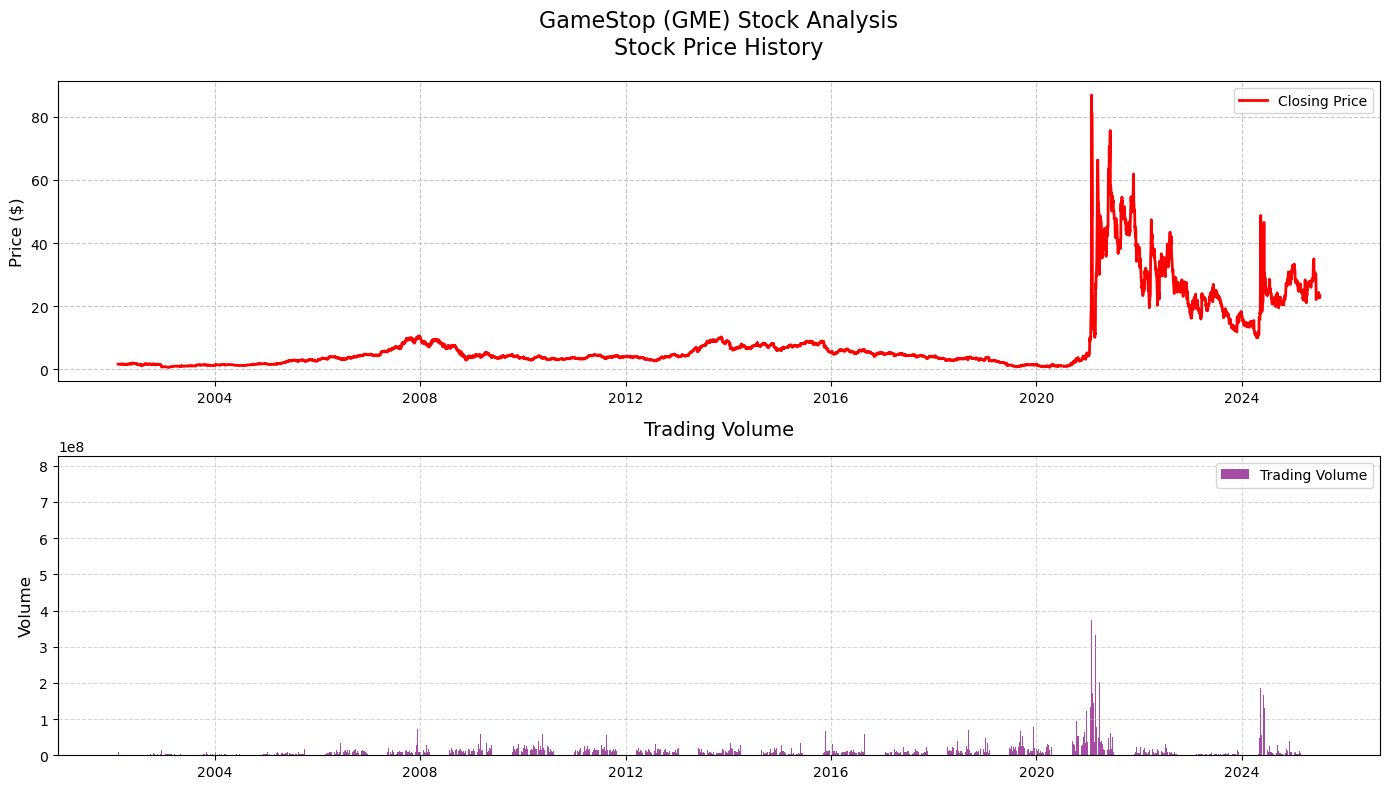

In [29]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 8))
    
    # Plot stock price data
    plt.subplot(2, 1, 1)
    plt.plot(stock_data['Date'], stock_data['Close'], 
            label='Closing Price', 
            color='red', 
            linewidth=2)
    plt.title(title + '\nStock Price History', fontsize=16, pad=20)
    plt.ylabel('Price ($)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Plot volume data as secondary subplot
    plt.subplot(2, 1, 2)
    plt.bar(stock_data['Date'], stock_data['Volume'], 
            label='Trading Volume', 
            color='purple',
            alpha=0.7)
    plt.title('Trading Volume', fontsize=14, pad=15)
    plt.ylabel('Volume', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

# Fetch GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Create and display the graph
make_graph(gme_data, 
        None,  # Replace with GME revenue data if available
        "GameStop (GME) Stock Analysis")